 ## The Ping Model


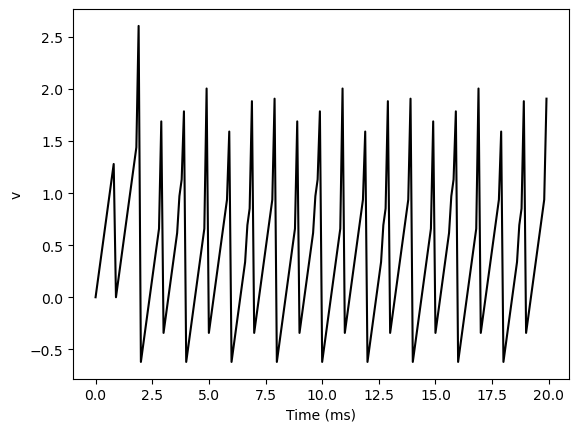

In [1]:
from brian2 import *
start_scope()

tau = 5*ms
Ve = 50   # Reversal potential for excitatory synapse
Vi = -50   # Reversal potential for excitatory synapse

# Define equations for the excitatory population
eqs_exc = '''
dv/dt = (-Ve - Vi + 5) / tau : 1
'''

# Define equations for the inhibitory population
eqs_inh = '''
dv/dt = (-Vi - Ve + 3) / tau : 1
'''

# Create neuron groups for excitatory and inhibitory populations
exc = NeuronGroup(100,
                  eqs_exc,
                  threshold='v > 0.8',
                  reset='v = 0.3',
                  refractory=1*ms,
                  method='euler')

inh = NeuronGroup(25,
                  eqs_inh,
                  threshold='v > 0.5',
                  reset='v = -0.3',
                  refractory=1*ms,
                  method='euler')

# Define synaptic connections
exc_synapse = Synapses(exc, inh, 'w : 1', on_pre='v += w')
exc_synapse.connect(p=0.2)  # Connects each excitatory neuron to 20% of inhibitory neurons
exc_synapse.w = 'rand() * 0.2'

inh_synapse = Synapses(inh, exc, 'w : 1', on_pre='v -= w')
inh_synapse.connect(p=0.2)  # Connects each inhibitory neuron to 50% of excitatory neurons
inh_synapse.w = 'rand() * 0.2'# Initialize random weights

# Define monitors
statemon_exc = StateMonitor(exc, 'v', record=0)
spikemon_exc = SpikeMonitor(exc)

statemon_inh = StateMonitor(inh, 'v', record=0)
spikemon_inh = SpikeMonitor(inh)

# Run simulation
run(20*ms)

# Plot results
plot(statemon_exc.t/ms, statemon_exc.v[0] + statemon_inh.v[0], c="black")
xlabel('Time (ms)')
ylabel('v')
show()

plot(statemon_exc.t/ms, statemon_exc.v[0], c="red")
plot(statemon_exc.t/ms, statemon_inh.v[0], c="black")
xlabel('Time (ms)')
ylabel('v')
show()

plot(spikemon_exc.t/ms, 20 + spikemon_exc.i, '.r')
plot(spikemon_inh.t/ms, spikemon_inh.i, '.k')
xlabel('Time (ms)')
ylabel(' Neuron index')

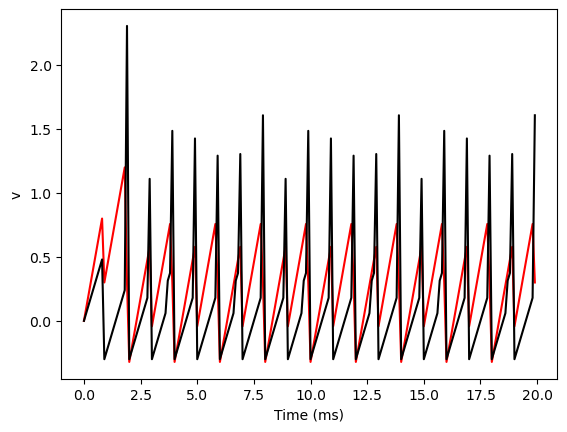

In [2]:
plot(statemon_exc.t/ms, statemon_exc.v[0], c="red")
plot(statemon_exc.t/ms, statemon_inh.v[0], c="black")
xlabel('Time (ms)')
ylabel('v')
show()

Text(0, 0.5, ' Neuron index')

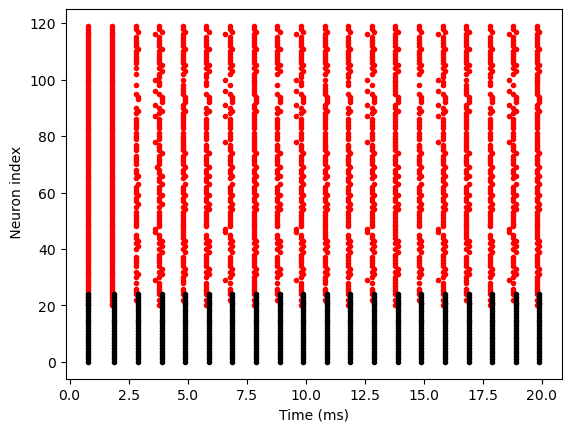

In [3]:
plot(spikemon_exc.t/ms, 20 + spikemon_exc.i, '.r')
plot(spikemon_inh.t/ms, spikemon_inh.i, '.k')
xlabel('Time (ms)')
ylabel(' Neuron index')

In [30]:
'''
# Model equations


2.0

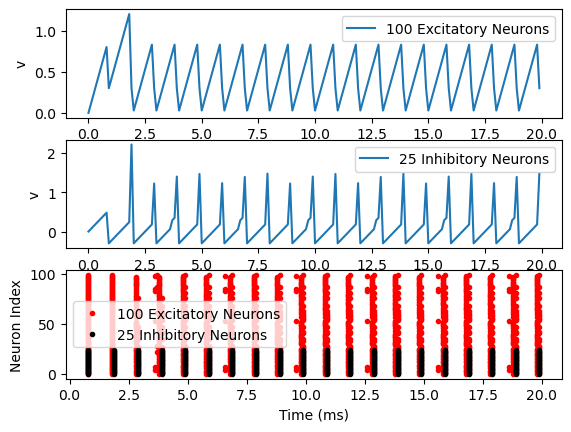

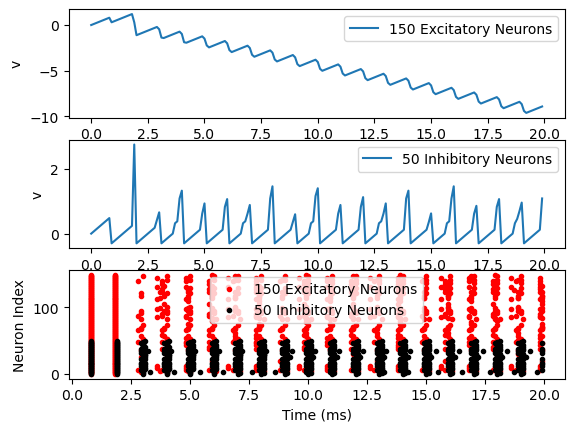

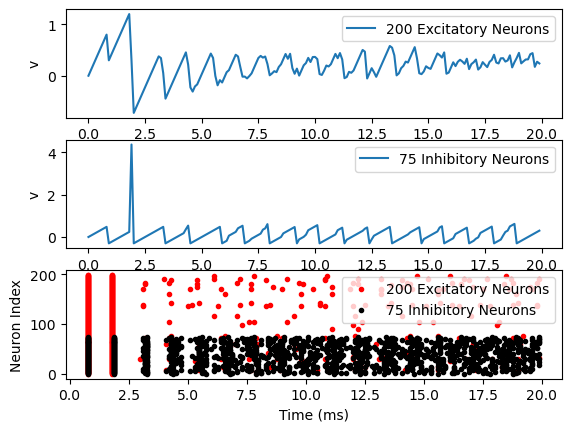

In [4]:
from brian2 import *
start_scope()

# Define parameters
num_e = [100, 150, 200]  # Number of excitatory neurons
num_i = [25, 50, 75]     # Number of inhibitory neurons

tau = 5*ms
Ve = 50   # Reversal potential for excitatory synapse
Vi = -50   # Reversal potential for inhibitory synapse

# Loop through different numbers of neurons
for ne, ni in zip(num_e, num_i):
    # Define equations for the excitatory population
    eqs_exc = '''
    dv/dt = (-Ve - Vi + 5) / tau : 1
    '''

    # Define equations for the inhibitory population
    eqs_inh = '''
    dv/dt = (-Vi - Ve + 3) / tau : 1
    '''

    # Create neuron groups for excitatory and inhibitory populations
    exc = NeuronGroup(ne,
                      eqs_exc,
                      threshold='v > 0.8',
                      reset='v = 0.3',
                      refractory=1*ms,
                      method='euler')

    inh = NeuronGroup(ni,
                      eqs_inh,
                      threshold='v > 0.5',
                      reset='v = -0.3',
                      refractory=1*ms,
                      method='euler')

    # Define synaptic connections
    exc_synapse = Synapses(exc, inh, 'w : 1', on_pre='v += w')
    exc_synapse.connect(p=0.2)  # Connects each excitatory neuron to 20% of inhibitory neurons
    exc_synapse.w = 'rand() * 0.2'

    inh_synapse = Synapses(inh, exc, 'w : 1', on_pre='v -= w')
    inh_synapse.connect(p=0.2)  # Connects each inhibitory neuron to 20% of excitatory neurons
    inh_synapse.w = 'rand() * 0.2'  # Initialize random weights

    # Define monitors
    statemon_exc = StateMonitor(exc, 'v', record=0)
    spikemon_exc = SpikeMonitor(exc)

    statemon_inh = StateMonitor(inh, 'v', record=0)
    spikemon_inh = SpikeMonitor(inh)

    # Run simulation
    run(20*ms)

    # Plot results
    subplot(3, 1, 1)
    plot(statemon_exc.t/ms, statemon_exc.v[0], label=f'{ne} Excitatory Neurons')
    xlabel('Time (ms)')
    ylabel('v')
    legend()

    subplot(3, 1, 2)
    plot(statemon_inh.t/ms, statemon_inh.v[0], label=f'{ni} Inhibitory Neurons')
    xlabel('Time (ms)')
    ylabel('v')
    legend()

    subplot(3, 1, 3)
    plot(spikemon_exc.t/ms, spikemon_exc.i, '.r', label=f'{ne} Excitatory Neurons')
    plot(spikemon_inh.t/ms, spikemon_inh.i, '.k', label=f'{ni} Inhibitory Neurons')
    xlabel('Time (ms)')
    ylabel('Neuron Index')
    legend()

    show()


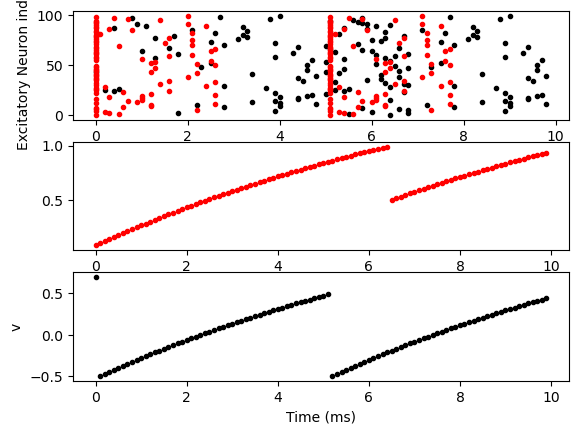

In [11]:
from brian2 import *

start_scope()

N = 100
tau = 10 * ms

Ve = 1   # Reversal potential for excitatory synapse
Vi = 0.8
eqs_exc = '''
dv/dt = (2 - v) / tau : 1
'''

eqs_inh = '''
dv/dt = (2 - v) / tau : 1
'''

# Neuron groups
E = NeuronGroup(N, eqs_exc, threshold='v>1', reset='v=0.5', refractory=5*ms, method='euler')
I = NeuronGroup(N, eqs_inh, threshold='v>0.5', reset='v=-0.5', refractory=2*ms, method='euler')

E.v = 'rand()'
I.v = 'rand()'

# Spike monitors

statemon_E = StateMonitor(E, 'v', record=0)
statemon_I = StateMonitor(I, 'v', record=0)

spikemon_E = SpikeMonitor(E)
spikemon_I = SpikeMonitor(I)

# Run simulation
run(10 * ms)

# Plotting
subplot(3, 1, 1)
plot(spikemon_E.t/ms, spikemon_E.i, '.k')
plot(spikemon_I.t/ms, spikemon_I.i, '.r')
xlabel('Time (ms)')
ylabel('Excitatory Neuron index')

subplot(3, 1, 2)
plot(statemon_E.t/ms, statemon_E.v[0], '.r')

subplot(3, 1, 3)
plot(statemon_I.t/ms, statemon_I.v[0], '.k')

#for t in spikemon_I.t:
#    axvline(t/ms, ls='--', c='C1', lw=3)
#axhline(0.5, ls=':', c='C2', lw=0.5)
xlabel('Time (ms)')
ylabel('v')

#plot(spikemon_I.t/ms, spikemon_I.i, '.r')

#plot(statemon_E.t/ms, statemon_E.v[0])
#for t in spikemon_E.t:
#    axvline(t/ms, ls='--', c='C1', lw=3)
#axhline(0.8, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v')

#xlabel('Time (ms)')
#ylabel('Inhibitory Neuron index')

show()


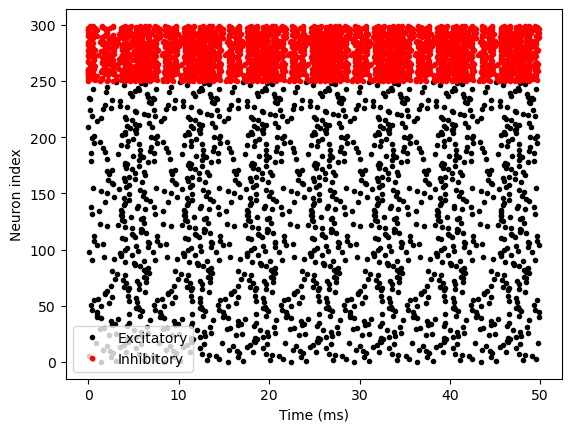

In [76]:
from brian2 import *

start_scope()

N_exc = 250  # Number of excitatory neurons
N_inh = 50   # Number of inhibitory neurons
tau = 10 * ms

# Model equations
eqs_exc = '''
dv/dt = (2 - v) / tau : 1
'''

eqs_inh = '''
dv/dt = (- v) / tau : 1
'''

# Neuron groups
E = NeuronGroup(N_exc, eqs_exc, threshold='v>1', reset='v=0', method='exact')
I = NeuronGroup(N_inh, eqs_inh, threshold='v>0.5', reset='v=-0.5', method='exact')

E.v = 'rand()'
I.v = 'rand()'

# Synapses (Excitatory to Inhibitory)
S_EI = Synapses(E, I, on_pre='v_post += 0.2')
S_EI.connect(p=0.2)  # Connect 20% of excitatory neurons to inhibitory neurons

# Spike monitors
spikemon_E = SpikeMonitor(E)
spikemon_I = SpikeMonitor(I)

# Run simulation
run(50 * ms)

# Plotting
plot(spikemon_E.t/ms, spikemon_E.i, '.k', label='Excitatory')
plot(spikemon_I.t/ms, spikemon_I.i + N_exc, '.r', label='Inhibitory')
xlabel('Time (ms)')
ylabel('Neuron index')
legend()
show()

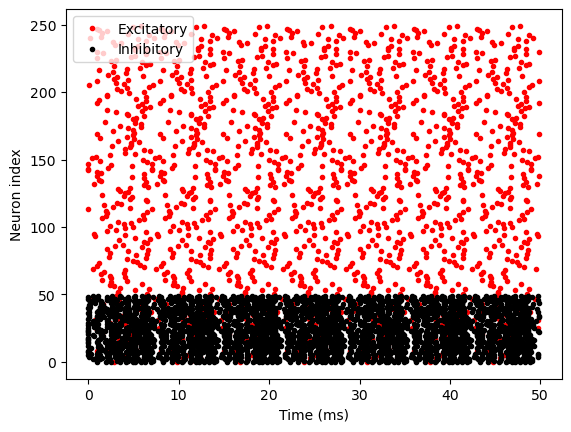

In [1]:
from brian2 import *

start_scope()

N_exc = 250  # Number of excitatory neurons
N_inh = 50   # Number of inhibitory neurons
tau = 10 * ms

# Model equations
eqs_exc = '''
dv/dt = (2 - v) / tau : 1
'''

eqs_inh = '''
dv/dt = (- v) / tau : 1
'''

# Neuron groups
E = NeuronGroup(N_exc, eqs_exc, threshold='v>1', reset='v=0', method='exact')
I = NeuronGroup(N_inh, eqs_inh, threshold='v>0.5', reset='v=-0.5', method='exact')

E.v = 'rand()'
I.v = 'rand()'

# Synapses (Excitatory to Inhibitory)
S_EI = Synapses(E, I, on_pre='v_post += 0.2')
S_EI.connect(p=0.2)  # Connect 20% of excitatory neurons to inhibitory neurons

# Spike monitors
spikemon_E = SpikeMonitor(E)
spikemon_I = SpikeMonitor(I)

# Run simulation
run(50 * ms)

# Plotting
plot(spikemon_E.t/ms, spikemon_E.i, '.r', label='Excitatory')
plot(spikemon_I.t/ms, spikemon_I.i, '.k', label='Inhibitory')
xlabel('Time (ms)')
ylabel('Neuron index')
legend()
show()



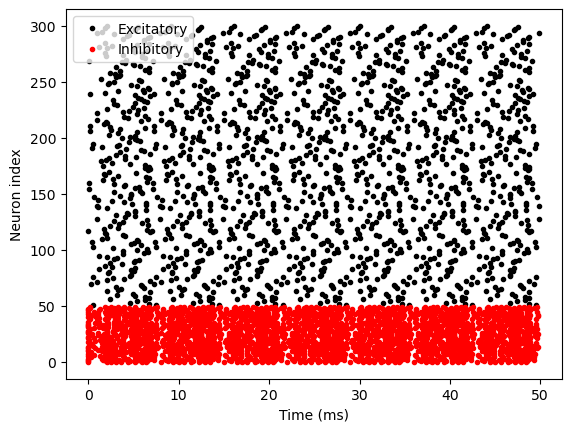

In [78]:
from brian2 import *

start_scope()

N_exc = 250  # Number of excitatory neurons
N_inh = 50   # Number of inhibitory neurons
tau = 10 * ms

# Model equations
eqs_exc = '''
dv/dt = (2 - v) / tau : 1
'''

eqs_inh = '''
dv/dt = (- v) / tau : 1
'''

# Neuron groups
E = NeuronGroup(N_exc, eqs_exc, threshold='v>1', reset='v=0', method='exact')
I = NeuronGroup(N_inh, eqs_inh, threshold='v>0.5', reset='v=-0.5', method='exact')

E.v = 'rand()'
I.v = 'rand()'

# Synapses (Excitatory to Inhibitory)
S_EI = Synapses(E, I, on_pre='v_post += 0.2')
S_EI.connect(p=0.2)  # Connect 20% of excitatory neurons to inhibitory neurons

# Spike monitors
spikemon_E = SpikeMonitor(E)
spikemon_I = SpikeMonitor(I)

# Run simulation
run(50 * ms)

# Plotting
plot(spikemon_E.t/ms, spikemon_E.i + N_inh + 1, '.k', label='Excitatory')
plot(spikemon_I.t/ms, spikemon_I.i, '.r', label='Inhibitory')
xlabel('Time (ms)')
ylabel('Neuron index')
legend()
show()


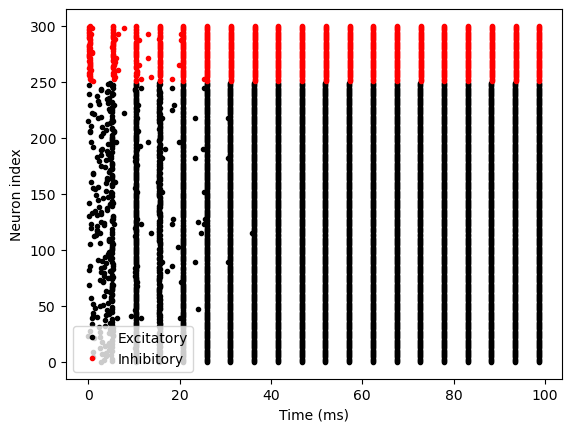

In [79]:
from brian2 import *

start_scope()

N_exc = 250  # Number of excitatory neurons
N_inh = 50   # Number of inhibitory neurons
tau_exc = 10 * ms
tau_inh = 10 * ms
tau_syn = 1 * ms
Vt = 1  # Threshold potential

# Model equations
eqs_exc = '''
dv/dt = (2 - v) / tau_exc : 1 (unless refractory)
'''
eqs_inh = '''
dv/dt = (-v) / tau_inh : 1 (unless refractory)
'''

# Neuron groups
E = NeuronGroup(N_exc, eqs_exc, threshold='v>Vt', reset='v=0', refractory=5*ms, method='euler')
I = NeuronGroup(N_inh, eqs_inh, threshold='v>Vt', reset='v=0', refractory=5*ms, method='euler')

E.v = 'rand()'
I.v = 'rand()'

# Synaptic connections (Excitatory to Inhibitory)
C_EI = Synapses(E, I, model='w : 1', on_pre='v_post += w')
C_EI.connect(p=0.2)  # Connect 20% of excitatory neurons to inhibitory neurons
C_EI.w = 'rand()'

# Synaptic connections (Inhibitory to Excitatory with delay)
C_IE = Synapses(I, E, model='w : 1', on_pre='v_post += w', delay=5*ms)
C_IE.connect(p=0.2)  # Connect 20% of inhibitory neurons to excitatory neurons with delay
C_IE.w = 'rand()'

# Spike monitors
spikemon_E = SpikeMonitor(E)
spikemon_I = SpikeMonitor(I)

# Run simulation
run(100 * ms)

# Plotting
plot(spikemon_E.t/ms, spikemon_E.i, '.k', label='Excitatory')
plot(spikemon_I.t/ms, spikemon_I.i + N_exc + 1, '.r', label='Inhibitory')
xlabel('Time (ms)')
ylabel('Neuron index')
legend()
show()
